In [1]:
import seaborn as sns
import pandas as pd
import pickle

In [2]:
with open("ag_data.pkl", 'rb') as f:
    d = pickle.load(f)
d.keys()

dict_keys(['fitnesses', 'avg_fitness', 'best_fitness', 'best_chromossome'])

In [3]:
df = pd.DataFrame(d)
df

,fitnesses,avg_fitness,best_fitness,best_chromossome
0,"[1.0451577394927805, 2.663884089070541, 0.3773...",2.088143,3.843074,2.977914
1,"[1.0089863110582318, 1.2681011466574632, 1.879...",2.417237,3.843074,2.977914
2,"[2.6368443240452777, 3.331572638992495, 1.0321...",2.655624,4.016995,3.105773
3,"[3.1080427568803985, 3.85279864868688, 2.66474...",2.990947,4.024795,3.105116
4,"[3.45626558602751, 2.93787745354237, 3.6185920...",3.220418,4.024795,3.105116
...,...,...,...,...
295,"[4.0263101677505695, 4.0263101677505695, 4.026...",4.026310,4.026310,3.104984
296,"[4.0263101677505695, 4.0263101677505695, 4.026...",4.026310,4.026310,3.104984
297,"[4.0263101677505695, 4.0263101677505695, 4.026...",4.026310,4.026310,3.104984
298,"[4.0263101677505695, 4.0263101677505695, 4.026...",4.026310,4.026310,3.104984


RuntimeError: matplotlib does not support generators as input

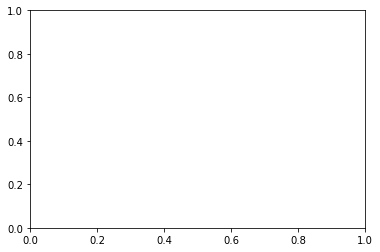

In [90]:
import numpy as np
plt.plot(map(np.mean, d['fitnesses']))

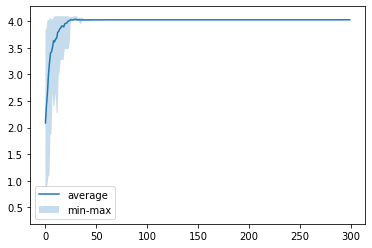

In [82]:
import matplotlib.pyplot as plt

fits = list(map(pd.DataFrame, d['fitnesses']))
n_fits = list()
for i, df in enumerate(fits):
    df['index'] = i
    n_fits.append(df.rename(columns={0:'fit'}))
fits = n_fits

df_fits = pd.concat(fits).groupby('index')['fit']
# sns.lineplot(data=pd.concat(fits), x='index', y='fit', ci=100, n_boot=1)
plt.plot(df_fits.mean(), label='average')
plt.fill_between(df_fits.min().index, df_fits.min(), df_fits.max(), alpha=0.25, label='min-max')
plt.legend()

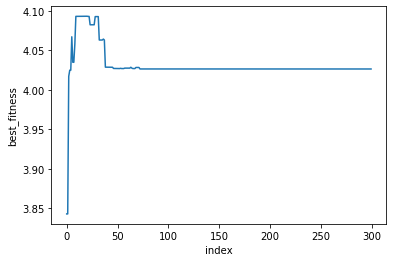

In [7]:
# sns.displot(data=df.reset_index(), x='index', y='best_fitness')